In [ ]:
#리니어리그레서로 분석

In [2]:
#데이터 불러오기
import pandas as pd
df=pd.read_csv('data/df.csv')

In [3]:
df

,날짜,국적지역,입국자수
0,2022-01-01,그리스,390
1,2022-02-01,그리스,307
2,2022-03-01,그리스,418
3,2022-04-01,그리스,292
4,2022-05-01,그리스,425
...,...,...,...
2838,2024-08-01,홍콩,61592
2839,2024-09-01,홍콩,39815
2840,2024-10-01,홍콩,52005
2841,2024-11-01,홍콩,46366


In [4]:
# 날짜 변환 및 연도/월 컬럼 추가
df["날짜"] = pd.to_datetime(df["날짜"])
df["연도"] = df["날짜"].dt.year
df["월"] = df["날짜"].dt.month

In [5]:
# 국가별 평균 입국자 수(Target Encoding) 적용
df["국가코드"] = df.groupby("국적지역")["입국자수"].transform("mean")

In [6]:
df

,날짜,국적지역,입국자수,연도,월,국가코드
0,2022-01-01,그리스,390,2022,1,682.055556
1,2022-02-01,그리스,307,2022,2,682.055556
2,2022-03-01,그리스,418,2022,3,682.055556
3,2022-04-01,그리스,292,2022,4,682.055556
4,2022-05-01,그리스,425,2022,5,682.055556
...,...,...,...,...,...,...
2838,2024-08-01,홍콩,61592,2024,8,28560.555556
2839,2024-09-01,홍콩,39815,2024,9,28560.555556
2840,2024-10-01,홍콩,52005,2024,10,28560.555556
2841,2024-11-01,홍콩,46366,2024,11,28560.555556


In [7]:
# 특징 및 타겟 설정
X = df[["연도", "월", "국가코드"]]
y = df["입국자수"]

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression


model=LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred=model.predict(X_test)

In [13]:
#모델 평가
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.58430203061955

In [14]:
# 다항 회귀 모델 적용 (2차 다항식)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [15]:
y_pred = poly_model.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.9064511078676363

In [18]:
# 2025~2026년 예측 데이터 생성
import numpy as np


future_dates = pd.DataFrame({
    "연도": np.repeat([2025, 2026], 12 * df["국적지역"].nunique()),
    "월": list(range(1, 13)) * 2 * df["국적지역"].nunique(),
    "국적지역": list(df["국적지역"].unique()) * 24
})

In [19]:
# 국가코드(Target Encoding) 적용
future_dates = future_dates.merge(df[["국적지역", "국가코드"]].drop_duplicates(), on="국적지역", how="left")


In [20]:
# 다항 회귀 모델을 활용한 예측
future_predictions = poly_model.predict(future_dates[["연도", "월", "국가코드"]])
future_dates["예측 입국자수"] = future_predictions

In [23]:
#한글 차트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_name = 'AppleGothic.ttf'

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_2591/1437923177.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(data=future_dates, x="월", y="예측 입국자수", hue="국적지역", ci=None)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44397 (\N{HANGUL 

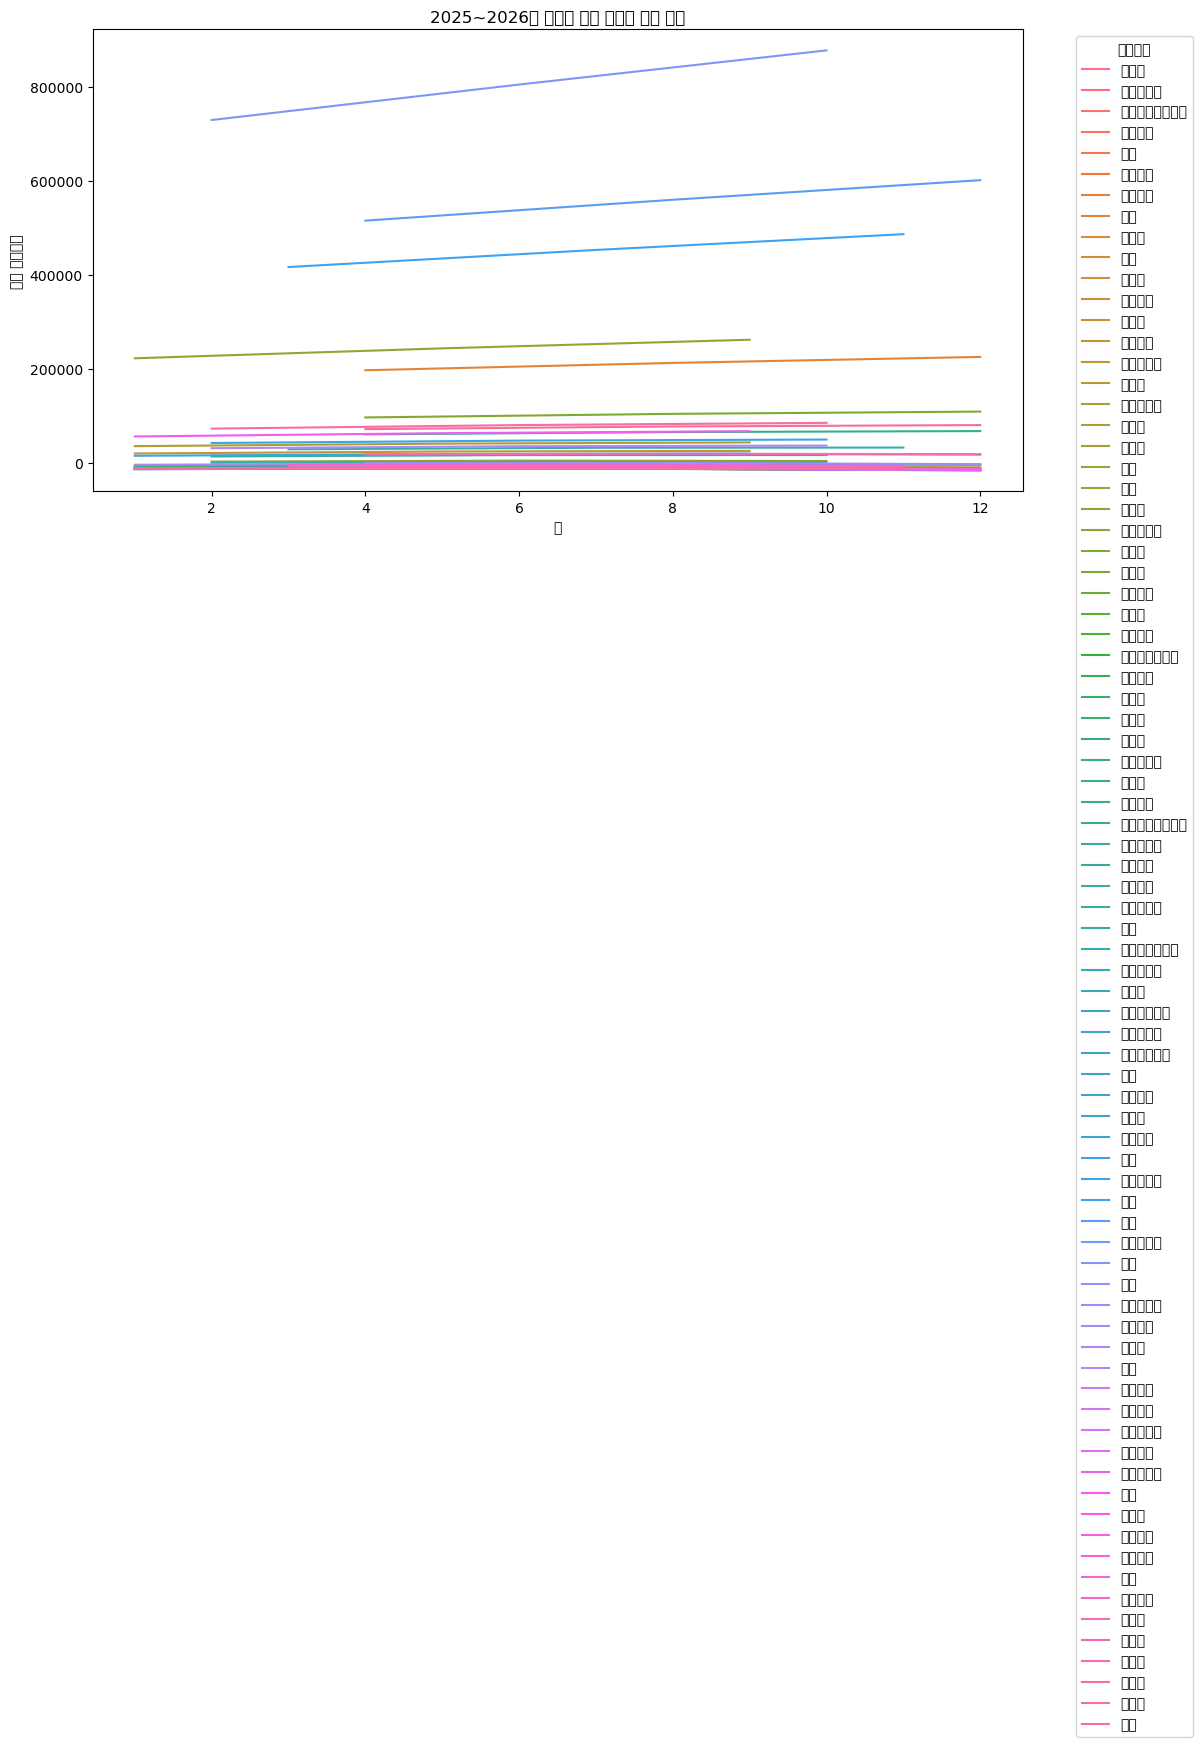

In [24]:
# 예측된 데이터 시각화 (국가별 입국자수 추이)
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 6))
sb.lineplot(data=future_dates, x="월", y="예측 입국자수", hue="국적지역", ci=None)
plt.title("2025~2026년 국가별 월별 입국자 예측 추이")
plt.xlabel("월")
plt.ylabel("예측 입국자수")
plt.legend(title="국적지역", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()